# Convolutional Neural Network (CNN)
https://en.wikipedia.org/wiki/Convolutional_neural_network

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# 9. hafta dersinde Sequaential model ile çözülen MNIST veritabanı için Convnet (CNN) modeli
inputs = keras.Input(shape=(28,28,1)) # Siyah Beyaz resim 1 kanal
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten() (x)
outputs = layers.Dense(10, activation="softmax")(x)


In [19]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         7385

In [8]:
from tensorflow.keras.datasets import mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [20]:
# model compile
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
# model fit
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0380 - accuracy: 0.9885
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0342 - accuracy: 0.9895
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0290 - accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0265 - accuracy: 0.9912


In [22]:
# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test doğruluğu: {test_acc:.3f}")

313/313 [==============================] - 3s 9ms/step - loss: 42.7565 - accuracy: 0.9314
Test doğruluğu: 0.931


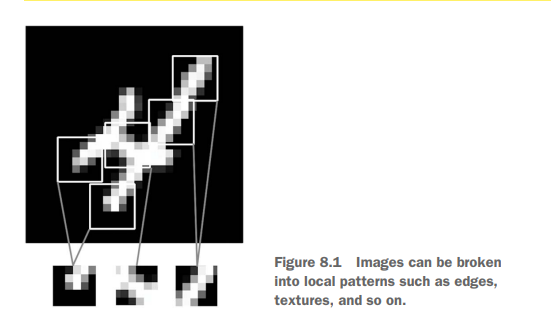

In [ ]:
# CNN, bir resmi bütün olarak değil küçük parçalara ayırarak öğrenir.

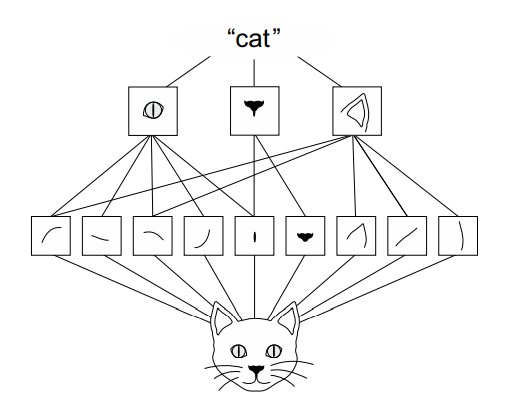

In [25]:
# Kaggle veriseti ()
# kaggle.com => account sayfasında size ait API key dosyasını indirin. kaggle.json
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yasarkucukefe","key":"5ddee151968ab464174bed10f5bd1a21"}'}

In [27]:
#!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:27<00:00, 28.8MB/s]
100% 812M/812M [00:27<00:00, 30.9MB/s]


In [30]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [31]:
!unzip --qq dogs-vs-cats.zip

In [32]:
!ls

dogs-vs-cats.zip  sample_data		test1.zip
kaggle.json	  sampleSubmission.csv	train.zip


In [34]:
!cd sample_data

In [3]:
!ls

sample_data


In [36]:
!unzip --qq dogs-vs-cats.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [37]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [38]:
!unzip --qq train.zip

In [39]:
!ls

dogs-vs-cats.zip  sample_data		test1.zip  train.zip
kaggle.json	  sampleSubmission.csv	train


In [41]:
# Resim dosyalarının ayrılması (train,validation,test)
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs")

In [44]:
def make_subset(subset_name,start_index,end_index):
  for category in ("cat","dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname) 

In [45]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [46]:
!ls

cats_vs_dogs	  kaggle.json  sampleSubmission.csv  train
dogs-vs-cats.zip  sample_data  test1.zip	     train.zip


In [47]:
!ls cats_vs_dogs

test  train  validation


In [49]:
# Model
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
inputs = keras.Input(shape=(180,180,3)) # 180x180 pixel renkli resimler
x = layers.Rescaling(1./255)(inputs) # 0-255 arasındaki olan değerleri 0-1.0 arasında yeniden ölçeklendir.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # resimde kedi var mı yok mu? Binary sınıflandırma => sigmoid
model = keras.Model(inputs = inputs, outputs=outputs)

In [54]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [55]:
# compile
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [56]:
# Resim dosyalarını oku ve dataset olarak kullan
from tensorflow.keras.utils import image_dataset_from_directory

In [57]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", 
    image_size=(180,180), 
    batch_size=32)

validataion_dataset = image_dataset_from_directory(
    new_base_dir / "validation", 
    image_size=(180,180), 
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test", 
    image_size=(180,180), 
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [59]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [62]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:",data_batch.shape)
  print("labels batch shape:",labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [63]:
import matplotlib.pyplot as plt

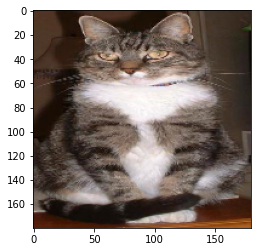

In [77]:
for images, _ in train_dataset.take(1):
  plt.imshow(images[0].numpy().astype("uint8"))


In [78]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss")]

In [79]:
# model fit
history = model.fit(train_dataset, epochs=30, validation_data=validataion_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 175s 3s/step - loss: 0.7143 - accuracy: 0.5060 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 200s 3s/step - loss: 0.7003 - accuracy: 0.5690 - val_loss: 0.6407 - val_accuracy: 0.6200
Epoch 3/30
63/63 [==============================] - 158s 3s/step - loss: 0.7021 - accuracy: 0.5985 - val_loss: 0.6305 - val_accuracy: 0.6430
Epoch 4/30
57/63 [==========================>...] - ETA: 12s - loss: 0.6423 - accuracy: 0.6453

KeyboardInterrupt: ignored

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validataion accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validataion loss")
plt.title("Training and Validation loss")
plt.legend()

# Data augmentation
Mevcut eğitim verisini kullanarak veri sayısını çoğaltmak olarak tanımlanabilir. Elimizde sınırlı sayıda veri varsa daha başarılı model oluşturmak için yeni bir veri sağlamak yerine mevcut veriyi çoğaltmak bir yol olabilir.
https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

In [2]:
data_augmentation = keras.Sequential([
                                      layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2)
])

NameError: ignored

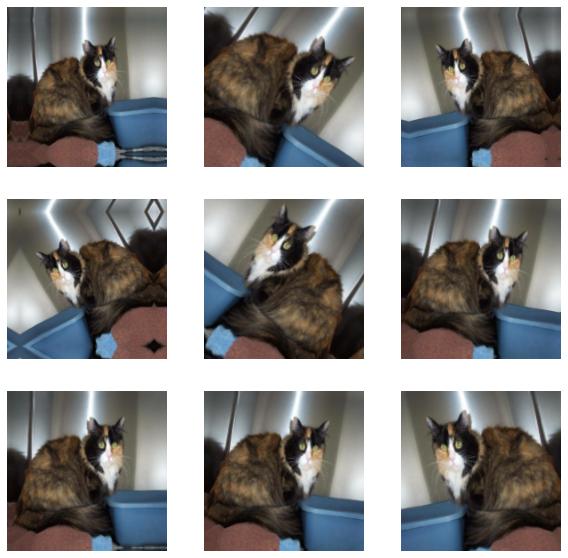

In [81]:
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [82]:
# Modelimize Data Augmentation ekleyelim
inputs = keras.Input(shape=(180,180,3)) # 180x180 pixel renkli resimler
x = data_augmentation(inputs) # ! DATA AUGMENTATION adımı
x = layers.Rescaling(1./255)(x) # 0-255 arasındaki olan değerleri 0-1.0 arasında yeniden ölçeklendir.
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # resimde kedi var mı yok mu? Binary sınıflandırma => sigmoid
model = keras.Model(inputs = inputs, outputs=outputs)

In [83]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_augmented.keras", save_best_only=True, monitor="val_loss")]

In [84]:
# compile
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [1]:
# model fit
history = model.fit(train_dataset, epochs=100, validation_data=validataion_dataset, callbacks=callbacks)

NameError: ignored